In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

## Problem definition

Cluster filghts based on day of week, departute time, carrier, airport, etc.

Dataset for clustering is "FlightsProcessedShort2.csv". It is preprocessed dataset on EDA step of the current project.
Dataset can be downloaded from

https://drive.google.com/open?id=1ZUHNIgxMqRbeDUS4PE2W-vVss_BZMA8G

### Load the data

In [35]:
df=pd.read_csv("FlightsProcessedShort2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,0,1,3,4,20,WN,N712SW,8,IAD,2
1,1,1,1,3,4,8,WN,N772SW,19,IAD,2
2,2,2,1,3,4,7,WN,N428WN,8,IND,2
3,3,3,1,3,4,18,WN,N464WN,34,IND,2
4,4,4,1,3,4,20,WN,N726SW,25,IND,2


## Feature Engineering

In [36]:
#converting categorical data to numerical dummies values
#df['Carrier'] = pd.get_dummies(df['Carrier'])#since among 20000 records that we use for clustering only 1 carrier, we drop this column for analysis

df['Origin'] = pd.get_dummies(df['Origin']) #since among 20000 records that we use for clustering only 1 carrier, we drop this column for analysis
df['TailNum'] = pd.get_dummies(df['TailNum'])
# select the columns
X_columns = ['DayOfWeek', 'SchedDepTime', 'DepDelay', 'Origin', 'Distance','TailNum']

# normalize the data
for col in X_columns:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))
    
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted

,Unnamed: 0,Unnamed: 0.1,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,0,1,3,-0.139273,1.083698,WN,-0.037442,-0.710246,-0.129122,0.263508
1,1,1,1,3,-0.139273,-1.878217,WN,-0.037442,-0.372028,-0.129122,0.263508
2,2,2,1,3,-0.139273,-2.125043,WN,-0.037442,-0.710246,-0.129122,0.263508
3,3,3,1,3,-0.139273,0.590046,WN,-0.037442,0.089179,-0.129122,0.263508
4,4,4,1,3,-0.139273,1.083698,WN,-0.037442,-0.187545,-0.129122,0.263508


## Model Training

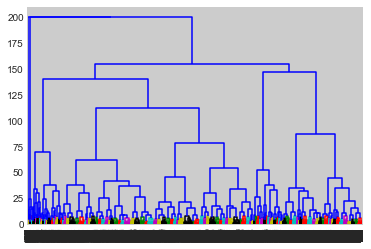

{1, 2, 3, 4, 5}
Counter({3: 13152, 5: 4748, 4: 1745, 2: 328, 1: 28})


In [37]:
k = 5
color_threshold = 8.
d = sch.distance.pdist(df[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df.copy()
df_results['cluster'] = T
df['cluster'] = T

In [38]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['DayOfWeek'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['DayOfWeek'])))

1 28
[-1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.1507471328299714, -0.6450100771557843, -0.13927302148159718, -0.13927302148159718, -0.13927302148159718, -0.13927302148159718, -0.13927302148159718, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.36646403419259, 0.8722010898667771, 0.8722010898667771, 1.3779381455409643, 1.3779381455409643, 1.3779381455409643, 1.3779381455409643, 1.3779381455409643, 1.3779381455409643]
2 328
[-1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.6564841885041586, -1.656484

In [39]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,1,2,3,4,5
Unnamed: 0,10096.11,10054.82,8944.08,10108.22,12880.78
Unnamed: 0.1,10096.11,10054.82,8944.08,10108.22,12880.78
Month,1.00,1.00,1.00,1.00,1.00
DayofMonth,11.32,11.77,10.25,11.38,14.00
DayOfWeek,0.15,-0.06,0.50,-0.22,-1.31
SchedDepTime,0.30,0.00,0.08,-0.45,-0.05
TailNum,26.71,-0.04,-0.04,-0.04,-0.04
DepDelay,-0.27,-0.09,0.09,-0.12,-0.21
Origin,-0.13,7.74,-0.13,-0.13,-0.13
Distance,0.55,-0.06,-0.18,2.31,-0.35


DayOfWeek


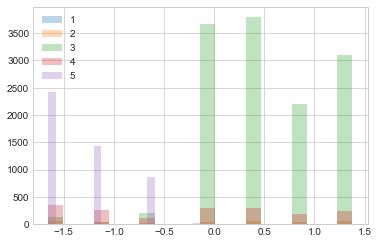

SchedDepTime


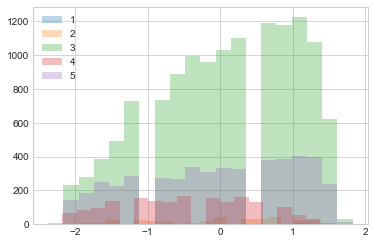

DepDelay


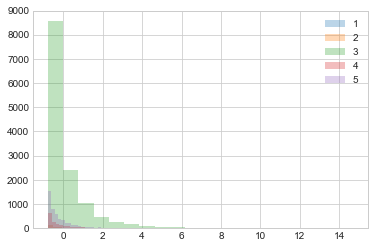

Origin


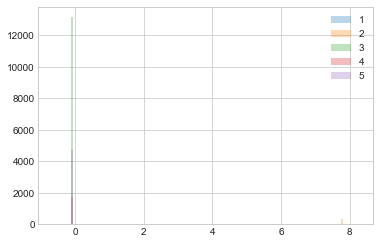

Distance


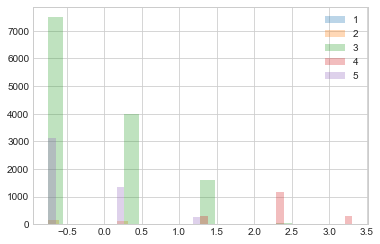

TailNum


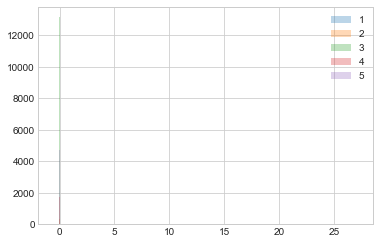

In [40]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(T):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

5
DayOfWeek


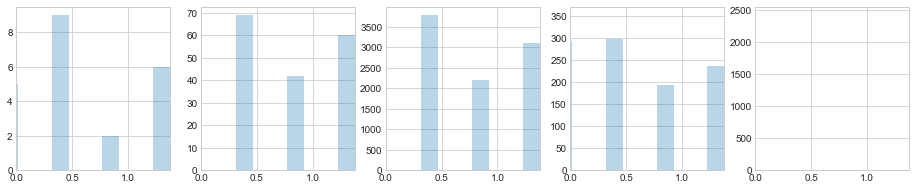

SchedDepTime


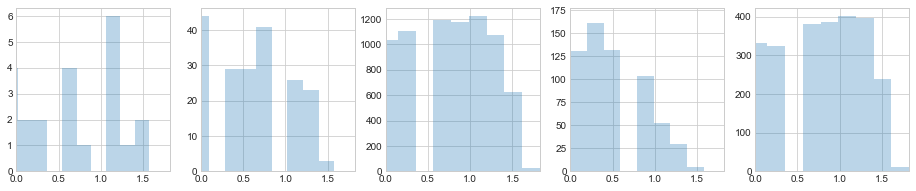

DepDelay


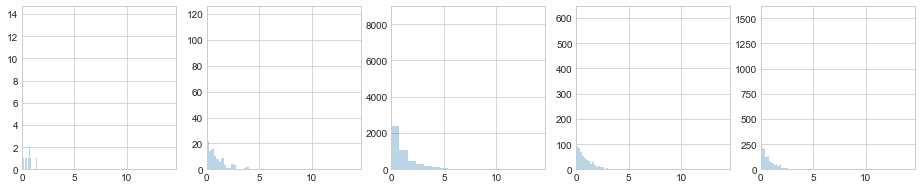

Origin


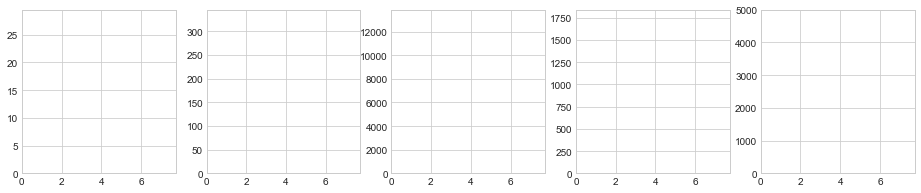

Distance


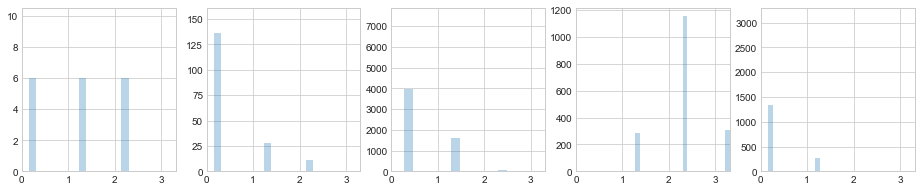

TailNum


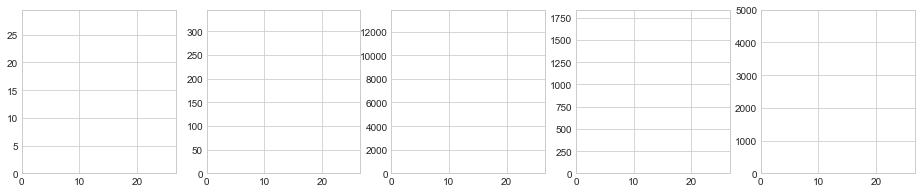

In [41]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

DayOfWeek


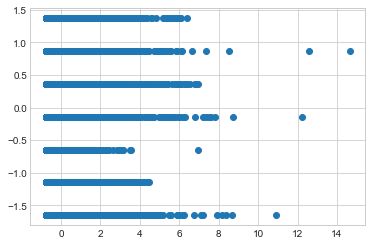

SchedDepTime


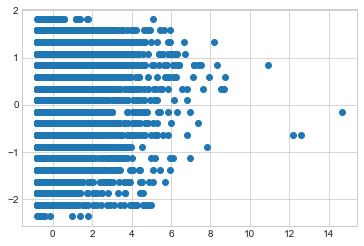

DepDelay


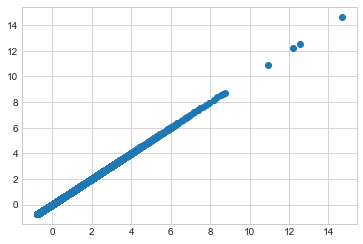

Origin


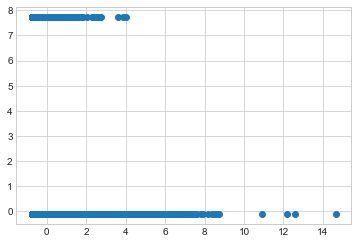

Distance


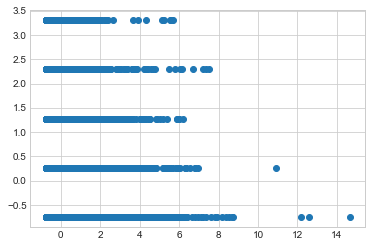

TailNum


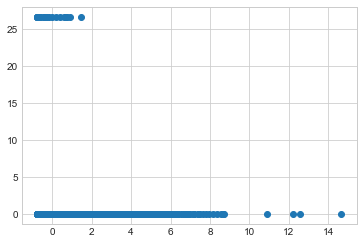

In [42]:
# Analyze the correlation with departure delay
for c in ['DayOfWeek', 'SchedDepTime', 'DepDelay', 'Origin', 'Distance','TailNum']:
    print(c)
    plt.plot(df_results['DepDelay'], df_results[c], 'o')
    plt.show()

<font color=blue>***according to the plots presented above, hierarchical clustering mechinsm did not provide clusters based on the relevance to the delay time (apparently other variables contributed much more to the proximity of flight data points)***</font>

## Model Evaluation

In [43]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(T)):
    centroids.append(df[df['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(T)):
    df_filter = df[df['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(T)):
    df_filter = df[df['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.6410762635050768
Intra Cluster distance 0.5303611531145348
Inertia 57277.65505278631


<font color=blue>***relatively close inter and intra cluster distance, as well as high inertia value reveals that hierarchical clustering  is not effective in our case. Solution would be to increase number of clusters, however it leads to significantly higher processing times***</font>

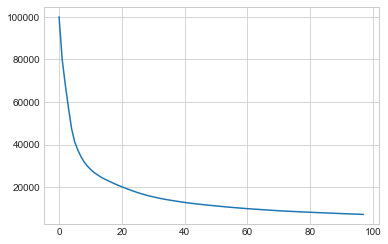

In [44]:
inertia = []
for k in range(2,100):
    d = sch.distance.pdist(df[X_columns])
    Z= sch.linkage(d, method = 'ward')
    T = sch.fcluster(Z, k, 'maxclust')
    df['cluster'] = T

    # Inertia
    distances = []
    for cluster in sorted(set(T)):
        df_filter = df[df['cluster']==cluster]
        centroid = df_filter[X_columns].mean().values
        for k, v in df_filter[X_columns].iterrows():
            distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
    inertia.append(np.sum(distances))
plt.plot(inertia)
plt.show()

PS: Calculating of inertia takes around 40 minutes.